In [2]:
#Importing Libraries
import geopandas as gpd
from pyproj import CRS, Transformer

In [3]:
gdf_new = gpd.read_file('/content/output_shapefile.shp')

In [ ]:
gdf_new


,isSelf,Price,Fuel_stati,Petrol_com,Type,Station_na,City,Latitude,Longitudin,geometry
0,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
1,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
2,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,POINT (15.07698 41.93851)
3,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
4,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
...,...,...,...,...,...,...,...,...,...,...
1205454,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205455,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205456,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)
1205457,0,2.337,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)


In [ ]:
gdf_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1205459 entries, 0 to 1205458
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   isSelf      1205459 non-null  int64   
 1   Price       1205459 non-null  float64 
 2   Fuel_stati  1205399 non-null  object  
 3   Petrol_com  1205035 non-null  object  
 4   Type        1205459 non-null  int64   
 5   Station_na  1205308 non-null  object  
 6   City        1205459 non-null  object  
 7   Latitude    1205459 non-null  float64 
 8   Longitudin  1205459 non-null  float64 
 9   geometry    1205459 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 92.0+ MB


In [4]:
target_crs = CRS.from_epsg(4326)

In [5]:
gdf_new.crs = CRS.from_epsg(4326)

In [6]:
transformer = Transformer.from_crs(gdf_new.crs, target_crs, always_xy=True)
gdf_new['geometry'] = gdf_new['geometry'].apply(lambda geom: transformer.transform(geom.x, geom.y))


<ipython-input-6-f169a1fcc467>:2: UserWarning: Geometry column does not contain geometry.
  gdf_new['geometry'] = gdf_new['geometry'].apply(lambda geom: transformer.transform(geom.x, geom.y))


In [ ]:
gdf_new

,isSelf,Price,Fuel_stati,Petrol_com,Type,Station_na,City,Latitude,Longitudin,geometry
0,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,"(18.03232192993164, 40.059120178222656)"
1,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,"(18.03232192993164, 40.059120178222656)"
2,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,"(15.07697582244873, 41.938507080078125)"
3,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,"(11.273765563964844, 45.38605880737305)"
4,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,"(11.273765563964844, 45.38605880737305)"
...,...,...,...,...,...,...,...,...,...,...
1205454,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,"(10.816605567932129, 45.52592086791992)"
1205455,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,"(10.816605567932129, 45.52592086791992)"
1205456,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,"(9.392951011657715, 45.54668045043945)"
1205457,0,2.337,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,"(9.392951011657715, 45.54668045043945)"


In [7]:
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(gdf_new['Latitude'], gdf_new['Longitudin'])]

gdf_new = gpd.GeoDataFrame(gdf_new, geometry=geometry)

In [ ]:
gdf_new

,isSelf,Price,Fuel_stati,Petrol_com,Type,Station_na,City,Latitude,Longitudin,geometry
0,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (40.05912 18.03232)
1,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (40.05912 18.03232)
2,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,POINT (41.93851 15.07698)
3,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (45.38606 11.27377)
4,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (45.38606 11.27377)
...,...,...,...,...,...,...,...,...,...,...
1205454,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (45.52592 10.81661)
1205455,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (45.52592 10.81661)
1205456,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (45.54668 9.39295)
1205457,0,2.337,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (45.54668 9.39295)


In [ ]:
output_shapefile_path = "geospatial.shp"
gdf_new.to_file(output_shapefile_path)

In [ ]:
gdf_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1205459 entries, 0 to 1205458
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   isSelf      1205459 non-null  int64   
 1   Price       1205459 non-null  float64 
 2   Fuel_stati  1205399 non-null  object  
 3   Petrol_com  1205035 non-null  object  
 4   Type        1205459 non-null  int64   
 5   Station_na  1205308 non-null  object  
 6   City        1205459 non-null  object  
 7   Latitude    1205459 non-null  float64 
 8   Longitudin  1205459 non-null  float64 
 9   geometry    1205459 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 92.0+ MB


In [ ]:
print(gdf_new['geometry'].dtype)

geometry


In [8]:
import random

subset_size = int(len(gdf_new) * 0.2)


subset_indices = random.sample(range(len(gdf_new)), subset_size)
subset_data = gdf_new.iloc[subset_indices]


In [ ]:
subset_data

,isSelf,Price,Fuel_stati,Petrol_com,Type,Station_na,City,Latitude,Longitudin,geometry
324626,1,1.638,pad multienergy s.p.a,esso,1,esso - chieti loc. brecciarola ss 5 km 214+425,chieti,42.325623,14.099712,POINT (42.32562 14.09971)
802085,0,2.139,economy s.r.l.,api-ip,1,economy s.r.l-pino torinese,pino torinese,45.038792,7.784751,POINT (45.03879 7.78475)
1200462,0,2.339,servizi e gestioni zenit s.r.l. sigla - zenit ...,esso,1,v.le europa rivanazzano terme,rivanazzano terme,44.942856,9.012012,POINT (44.94286 9.01201)
211145,1,1.695,zignani lino piero s.r.l.,api-ip,1,zignani lino piero srl,cesena,44.063763,12.183948,POINT (44.06376 12.18395)
1009154,0,2.039,emme petroli s.r.l.,emme petroli,1,emme petroli,nola,40.913532,14.526731,POINT (40.91353 14.52673)
...,...,...,...,...,...,...,...,...,...,...
171151,1,1.949,toil s.p.a.,toil,1,toil spa-gardesane,verona,45.451897,10.926692,POINT (45.45190 10.92669)
1165648,1,2.039,servizi & gestioni italia s.r.l.,q8,1,dogliani-via torino 8,dogliani,44.536091,7.936050,POINT (44.53609 7.93605)
643588,0,2.019,easy service s.r.l.,energas,1,easy service catanzaro,catanzaro,38.849152,16.643621,POINT (38.84915 16.64362)
497836,1,1.799,petrolbitumi - societa responsabilita limitata,api-ip,1,ip,carpineto sinello,42.013145,14.506807,POINT (42.01315 14.50681)


In [ ]:
subset_data.isnull().sum()


isSelf         0
Price          0
Fuel_stati    14
Petrol_com    84
Type           0
Station_na    36
City           0
Latitude       0
Longitudin     0
geometry       0
dtype: int64

In [ ]:
subset_data.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 241091 entries, 324626 to 312575
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   isSelf      241091 non-null  int64   
 1   Price       241091 non-null  float64 
 2   Fuel_stati  241077 non-null  object  
 3   Petrol_com  241007 non-null  object  
 4   Type        241091 non-null  int64   
 5   Station_na  241055 non-null  object  
 6   City        241091 non-null  object  
 7   Latitude    241091 non-null  float64 
 8   Longitudin  241091 non-null  float64 
 9   geometry    241091 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 20.2+ MB


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()

    # Remove stop words and join the remaining words back into a sentence
    meaningful_words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(meaningful_words)

In [ ]:
subset_data['Fuel_stati'] = subset_data['Fuel_stati'].astype(str)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
subset_data['Fuel_stati'] = subset_data['Fuel_stati'].apply(remove_stopwords)

In [ ]:
subset_data['Petrol_com'] = subset_data['Petrol_com'].astype(str)

In [ ]:
subset_data['Station_na'] = subset_data['Station_na'].astype(str)

In [ ]:
subset_data['City'] = subset_data['City'].astype(str)

In [ ]:
subset_data['Petrol_com'] = subset_data['Petrol_com'].apply(remove_stopwords)

In [ ]:
subset_data['Station_na'] = subset_data['Station_na'].apply(remove_stopwords)

In [ ]:
subset_data['City'] = subset_data['City'].apply(remove_stopwords)

In [ ]:
import libpysal as lps

k_neighbors = 3
distance_metric = 'euclidean'


In [ ]:
subset_data.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 241091 entries, 324626 to 312575
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   isSelf      241091 non-null  int64   
 1   Price       241091 non-null  float64 
 2   Fuel_stati  241091 non-null  object  
 3   Petrol_com  241091 non-null  object  
 4   Type        241091 non-null  int64   
 5   Station_na  241091 non-null  object  
 6   City        241091 non-null  object  
 7   Latitude    241091 non-null  float64 
 8   Longitudin  241091 non-null  float64 
 9   geometry    241091 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 20.2+ MB


In [ ]:
import numpy as np

# Convert the geometry to a list of coordinates and then to a 2D NumPy array
coordinates = [np.array(geometry.coords) for geometry in subset_data.geometry]
coordinates_2d = np.vstack(coordinates)


In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
knn.fit(coordinates_2d)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [ ]:
distances, indices = knn.kneighbors(coordinates_2d)

In [ ]:
weights = 1 / (1 + distances)


In [ ]:
num_observations = len(subset_data)
W = np.zeros((num_observations, num_observations))

for i in range(num_observations):
    for j in range(k_neighbors):
        neighbor_index = indices[i, j]
        W[i, neighbor_index] = weights[i, j]
        W[neighbor_index, i] = weights[i, j]


In [ ]:
W

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
from libpysal import weights
from esda.moran import Moran
import numpy as np
from scipy.sparse import csr_matrix


In [ ]:
w_sparse = csr_matrix(W)


In [ ]:
print(w_sparse.shape)


(241091, 241091)


In [ ]:
w_sparse

<241091x241091 sparse matrix of type '<class 'numpy.float64'>'
	with 1267666 stored elements in Compressed Sparse Row format>

In [ ]:
mean_price = np.mean(subset_data['Price'])
variance_price = np.var(subset_data['Price'])


In [ ]:
deviations = subset_data['Price'].sub(mean_price)


In [ ]:
spatial_lag = w_sparse * deviations
print('The Spatial Lag',spatial_lag)

The Spatial Lag [-0.52404436  0.40863916  0.04363927 ...  0.57363901 -0.30636075
  0.21303773]


In [ ]:
numerator = np.dot(deviations, deviations)
denominator = variance_price * len(subset_data)
observed_moran_I = len(subset_data) / (2 * denominator) * numerator


In [ ]:
observed_moran_I

120545.49999999935

In [ ]:
sum_weighted_differences = np.sum((deviations** 2))


# Calculate Geary's C
n = len(subset_data['Price'])
geary_C = (n - 1) * sum_weighted_differences / (2 * sum(deviations ** 2))

print(f"Geary's C: {geary_C}")

Geary's C: 120544.99999996737


In [ ]:
#Moran's I Value

# Specify the number of permutations
num_permutations = 999

# Create a list to store permuted Moran's I values
permuted_moran_values = []

# Perform the permutation test
for _ in range(num_permutations):

    permuted_data = np.random.permutation(subset_data['Price'])
    numerator = np.dot(deviations, deviations)
    denominator = variance_price * len(permuted_data)
    permuted_moran_I   = len(subset_data['Price']) / (2 * denominator) * numerator
    permuted_moran_values.append(permuted_moran_I)

# Calculate the two-tailed p-value
p_value = (sum(permuted_moran_values >= observed_moran_I) + sum(permuted_moran_values <= -observed_moran_I)) / num_permutations

print(f"Observed Moran's I: {observed_moran_I}")
print(f"P-value: {p_value}")


Observed Moran's I: 120545.49999999935
P-value: 1.0


Interpretation of P-Value for Moran's I:
 Alpha Value is 0.05
 P-Value is 1

H0 : The Spatial pattern is not statistically significant
HA : The Spatial pattern is  statisically significant

So, P-Value is Greater than given level of significance , so we fail to reject the null hypothesis

Failing to reject the null hypothesis means that there is insufficient evidence to conclude that the spatial pattern is statistically significant.

In [ ]:
#Geary'C Value
num_permutations = 999

# Create a list to store permuted Geary's C values
permuted_geary_values = []

# Perform the permutation test
for _ in range(num_permutations):
    # Permute the data while preserving the spatial structure
    permuted_data =  np.random.permutation(subset_data['Price'])
    sum_weighted_differences = np.sum((deviations** 2))
# Calculate Geary's C
    n = len(permuted_data)
    permuted_geary_C = (n - 1) * sum_weighted_differences / (2 * sum(deviations ** 2))

    permuted_geary_values.append(permuted_geary_C)

# Calculate the two-tailed p-value
p_value = (sum(permuted_geary_values >= geary_C) + sum(permuted_geary_values <= -geary_C)) / num_permutations

print(f"Observed Geary's C: {geary_C}")
print(f"P-value: {p_value}")

Observed Geary's C: 120544.99999996737
P-value: 1.0


Interpretation of P-Value for Geary's C Value :
 Alpha Value is 0.05
 P-Value is 1

H0 : The Spatial pattern is not statistically significant
HA : The Spatial pattern is  statisically significant

So, P-Value is Greater than given level of significance , so we fail to reject the null hypothesis

Failing to reject the null hypothesis means that there is insufficient evidence to conclude that the spatial pattern is statistically significant.

In [9]:
import geopandas as gpd

buffer_distance = 0.01

gdf_polygons = subset_data.copy()
gdf_polygons["geometry"] = subset_data.geometry.buffer(buffer_distance)


In [10]:
from libpysal.weights import Queen
from esda.moran import Moran_Local
from splot.esda import lisa_cluster


In [11]:
w_queen = Queen.from_dataframe(gdf_polygons)

<ipython-input-11-863b7710b1a6>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = Queen.from_dataframe(gdf_polygons)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 20810 disconnected components.
 There are 565 islands with ids: 248, 463, 543, 936, 937, 1754, 1812, 2105, 2298, 2860, 2978, 3111, 3539, 4156, 4180, 4555, 4915, 7164, 7225, 7276, 7553, 8077, 8434, 9625, 9841, 11522, 11748, 12370, 12410, 12518, 12816, 12863, 13151, 13958, 14245, 14807, 15083, 15153, 15385, 15576, 15614, 15656, 15778, 15809, 15964, 18022, 18037, 18048, 18824, 19548, 19864, 20497, 20657, 22009, 23069, 23908, 24854, 25186, 25294, 25640, 26875, 27670, 27785, 28909, 29013, 29329, 29640, 29794, 29866, 31688, 32249, 32413, 33762, 34265, 34605, 34675, 34919, 35901, 36718, 36989, 37579, 38078, 38530, 39080, 

In [12]:
local_moran = Moran_Local(gdf_polygons['Price'], w_queen)


('WARNING: ', 248, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no neighbors)')
('WARNING: ', 543, ' is an island (no neighbors)')
('WARNING: ', 936, ' is an island (no neighbors)')
('WARNING: ', 937, ' is an island (no neighbors)')
('WARNING: ', 1754, ' is an island (no neighbors)')
('WARNING: ', 1812, ' is an island (no neighbors)')
('WARNING: ', 2105, ' is an island (no neighbors)')
('WARNING: ', 2298, ' is an island (no neighbors)')
('WARNING: ', 2860, ' is an island (no neighbors)')
('WARNING: ', 2978, ' is an island (no neighbors)')
('WARNING: ', 3111, ' is an island (no neighbors)')
('WARNING: ', 3539, ' is an island (no neighbors)')
('WARNING: ', 4156, ' is an island (no neighbors)')
('WARNING: ', 4180, ' is an island (no neighbors)')
('WARNING: ', 4555, ' is an island (no neighbors)')
('WARNING: ', 4915, ' is an island (no neighbors)')
('WARNING: ', 7164, ' is an island (no neighbors)')
('WARNING: ', 7225, ' is an island (no neighbors)')
('WARNING: ', 727

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [13]:
from esda.moran import Moran
moran_value = local_moran.Is
moran_value

array([-0.04057405,  0.40275912,  0.43042605, ..., -1.06049302,
        0.10936334,  0.03199651])

In [14]:
permutations = 999

# Perform a permutation test
moran_local_permuted = Moran_Local(gdf_polygons['Price'], w_queen, permutations=permutations)

# Access the p-values for local Moran's I
local_moran_p_values = moran_local_permuted.p_sim

# Determine statistically significant observations
significant_observations = local_moran_p_values < 0.05

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [15]:
local_moran_p_values

array([0.195, 0.017, 0.018, ..., 0.032, 0.152, 0.429])

In [16]:
significant_observations

array([False,  True,  True, ...,  True, False, False])

In [ ]:
spatial_lag_values = np.zeros(len(gdf_polygons['Price']))

# Iterate over each observation
for i in range(len(gdf_polygons)):
    # Get the weights for the i-th observation
    observation_weights = W[i]

    # Calculate the spatial lag for the i-th observation
    spatial_lag = np.sum(gdf_polygons['Price'] * observation_weights)
    spatial_lag_values[i] = spatial_lag


In [ ]:
gdf_polygons['spatial_lag'] = spatial_lag_values


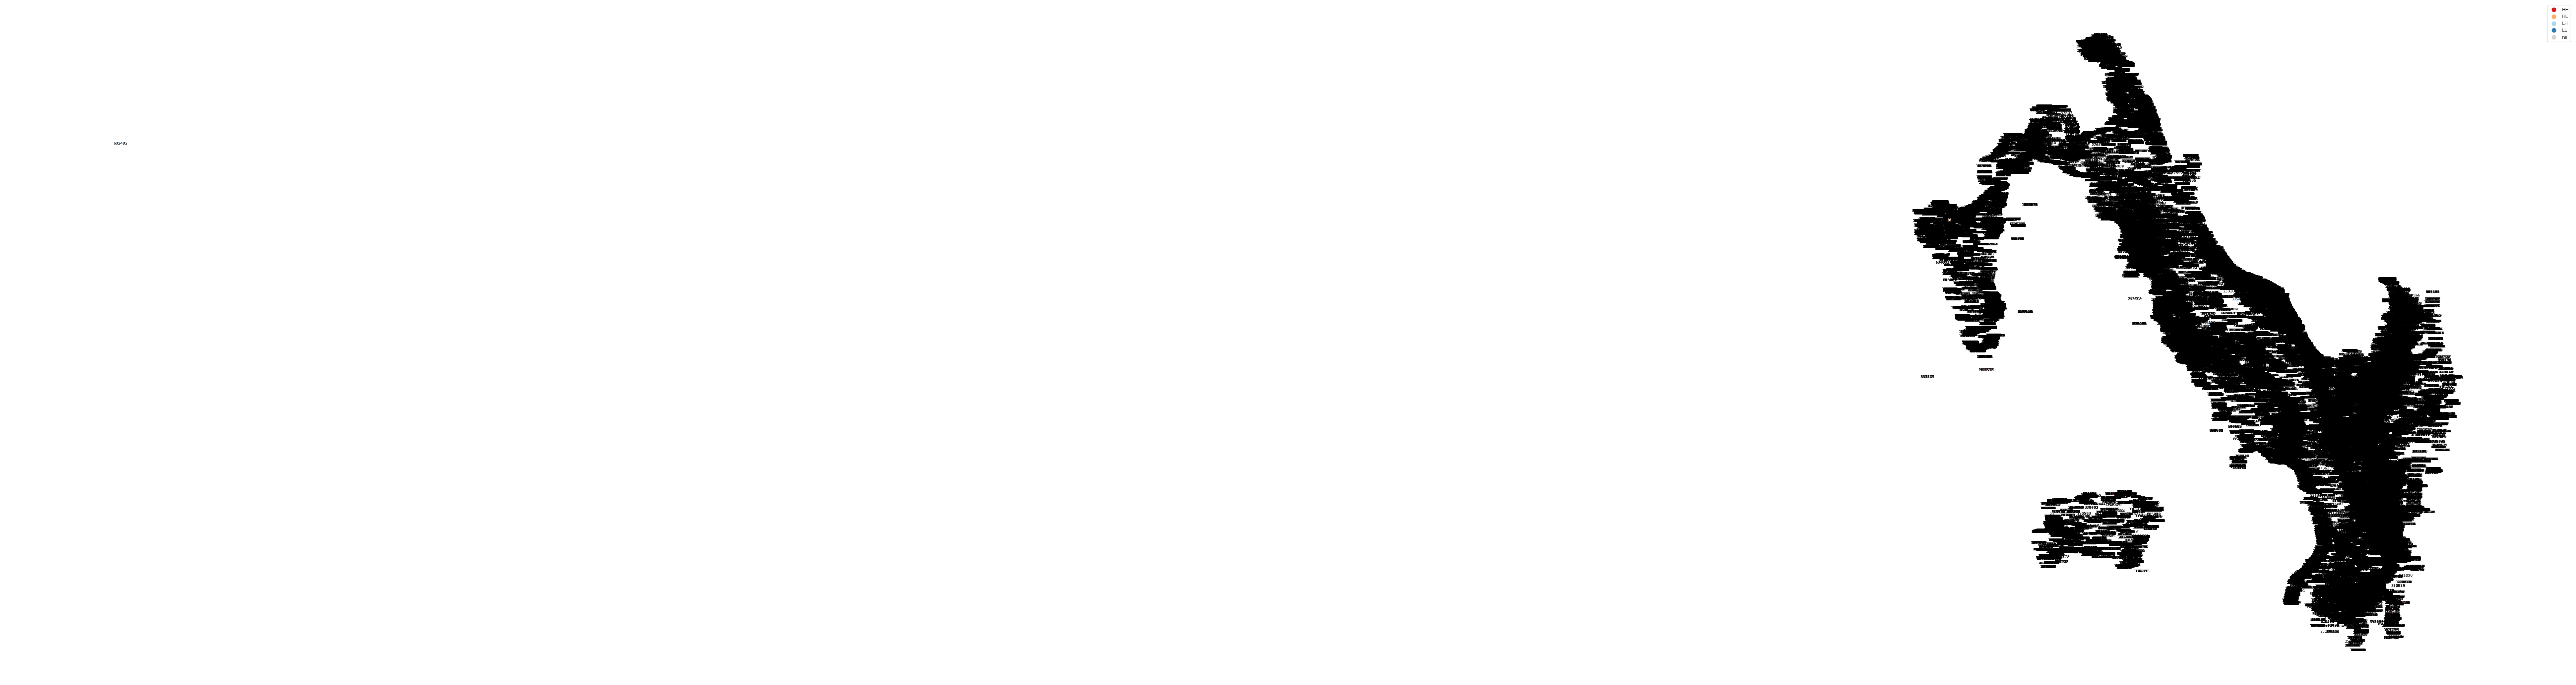

In [17]:
from splot.esda import lisa_cluster
import matplotlib.pyplot as plt

fig, ax = lisa_cluster(local_moran,gdf_polygons, p=0.05, figsize=(100, 100))

high_high_color = 'red'  # Example: High-High clusters
low_low_color = 'blue'    # Example: Low-Low clusters
high_low_color = 'yellow' # Example: High-Low clusters
low_high_color = 'green'  # Example: Low-High clusters


cluster_color_map = {
    'HH': high_high_color,
    'LL': low_low_color,
    'HL': high_low_color,
    'LH': low_high_color,
}

for i, txt in enumerate(gdf_polygons.index):
    x, y = gdf_polygons.geometry.iloc[i].centroid.xy  # Find the centroid of each geometry
    ax.annotate(txt, (x[0], y[0]), fontsize=8, ha='center', va='center')

# Display the plot
plt.show()
